![](https://www.kaggle.com/static/images/site-logo.png)  
## Titanic: Machine Learning from Disaster

The aim of this machine learning project is to practise and familiarise myself with basic machine learning techniques. Objective of this exercise itself is to predict the survival of the passengers listed in the test dataset, and attempt to get a score of over 70%.  Along the way, we should be able to tell which are the major factors contributing to the passengers' survival.  
-_Yida_

### 1. Load and read the data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
raw = pd.read_csv('./data/train.csv')
raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(raw.shape)
raw.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


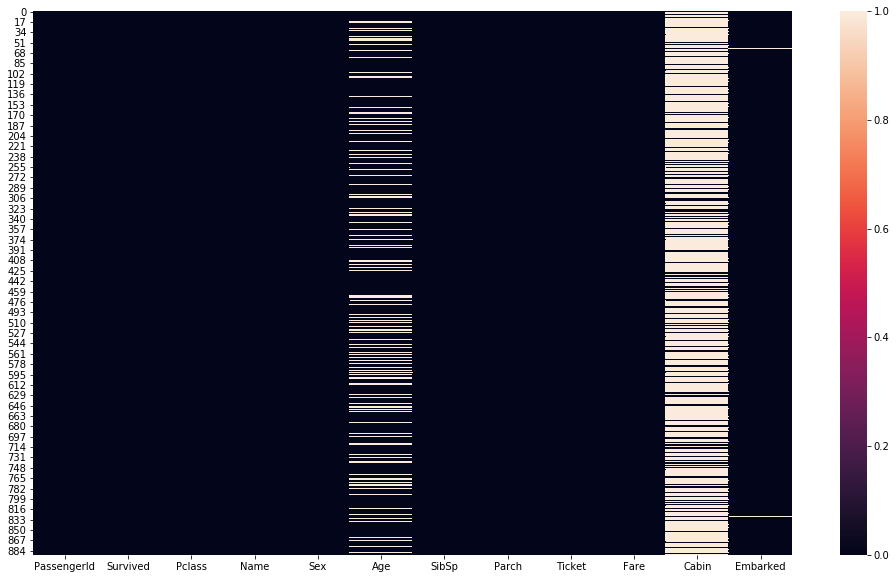

In [4]:
fig,ax = plt.subplots(figsize = (17,10))
ax = sns.heatmap(raw.isnull())
plt.show()

There are null values for the Age, Cabin and Embarked categories. These will need to be taken care of as we proceed further into exploring the dataset.

In [5]:
test_raw = pd.read_csv('./data/test.csv')
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 2. Cleaning Data

In [6]:
#Age will be imputed based the median age for those with the same Pclass and gender. 
raw[raw['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [7]:
#Getting the medians for each Pclass and Sex, filling in null values for Age according to Pclass and Sex
medians = {}
for c in raw['Pclass'].unique():
    medians[c]= {}
    for sex in raw['Sex'].unique():
        med = raw.loc[(raw['Pclass']==c)&(raw['Sex']==sex),'Age'].median()
        raw.loc[(raw['Pclass']==c)&(raw['Sex']==sex)&(raw['Age'].isnull()),'Age'] = med        
        medians[c][sex] = med

In [8]:
#Checking for medians-we want to fill in the test set with the same data.
medians

{3: {'male': 25.0, 'female': 21.5},
 1: {'male': 40.0, 'female': 35.0},
 2: {'male': 30.0, 'female': 28.0}}

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
#filling up the test set with the same median info
for c in test_raw['Pclass'].unique():
    for sex in test_raw['Sex'].unique():
        test_raw.loc[(test_raw['Pclass']==c)&(test_raw['Sex']==sex)&(test_raw['Age'].isnull()),'Age'] = medians[c][sex]

In [11]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
#There are 2 missing values for Embarked in the train dataset, and no null values for test dataset. 
#Since there's only 2, we can fill them up with the majority class.
raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#Majority class is 'S'. We shall fill the null values with 'S'
raw['Embarked'].fillna('S',inplace=True)

In [14]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 3. EDA

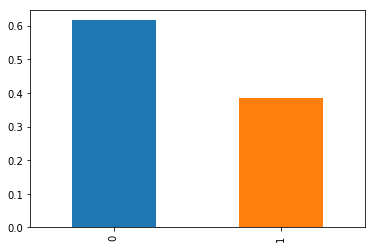

In [15]:
#Distribution of survivors
(raw['Survived'].value_counts()/raw['Survived'].count()).plot.bar()
#Approx 2/3 of all the passengers in the dataset died.

In [16]:
#Taking a look at the distribution of data
def pivot_plot(cat):
    pivot = raw.pivot_table(index=cat, values='Survived')
    pivot.plot.bar()

In [17]:
print(raw.columns)
#Plotting the survival characteristics of the different categorical values
categorical = ['Pclass','Sex','SibSp','Parch','Ticket','Cabin','Embarked']

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


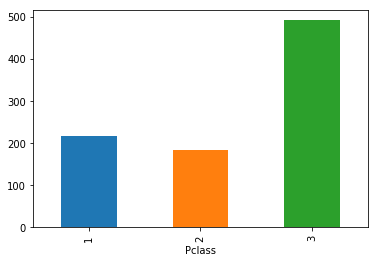

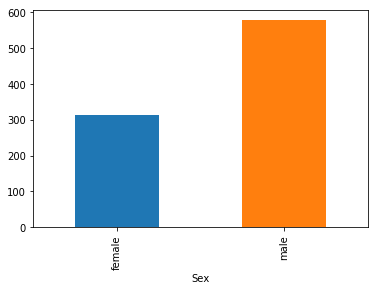

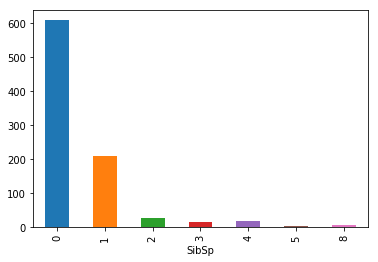

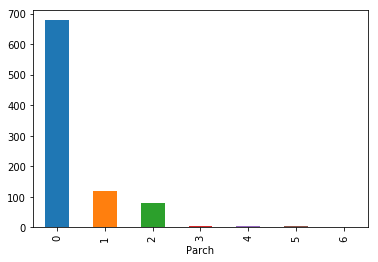

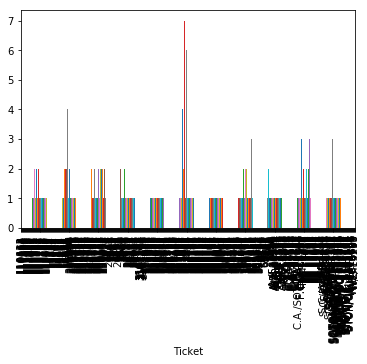

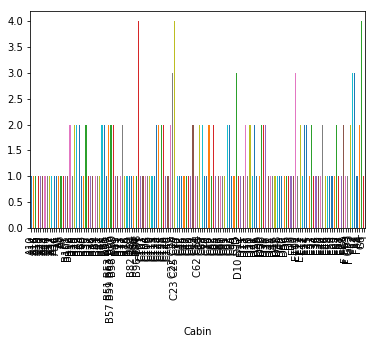

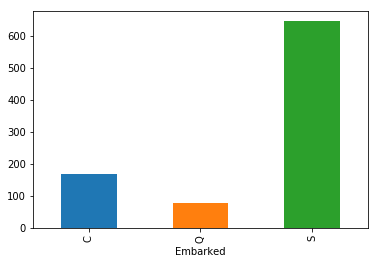

In [18]:
#Looking at the total distribution of passengers by the different categories.
for cat in categorical:
    raw.groupby(cat)[cat].count().plot.bar()
    plt.show()

Most passengers are male, travelled without family, and bought 3rd class tickets. Most passengers embarked at location 'S'.

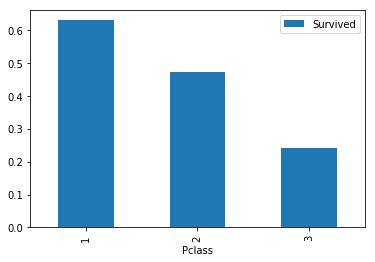

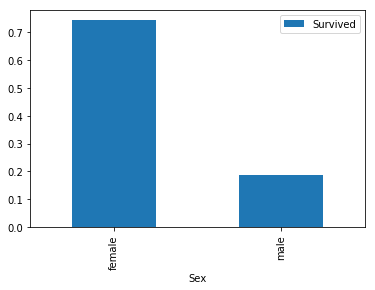

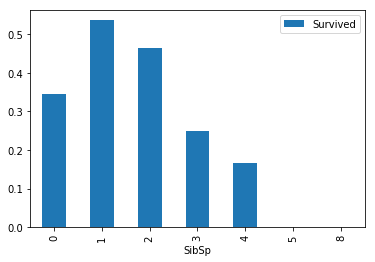

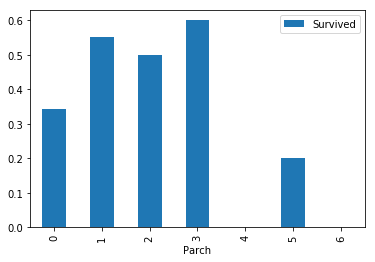

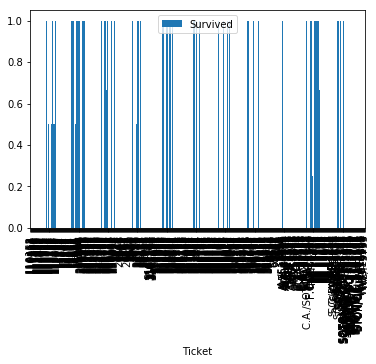

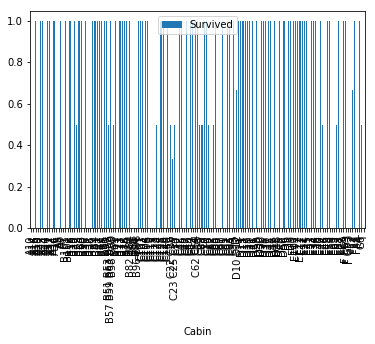

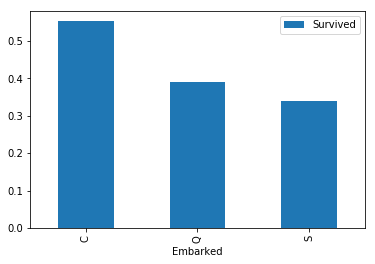

In [19]:
#Looking at the distribution of passengers in each categories that actually survived.
for cat in categorical:
    pivot_plot(cat)

Comments: In general, more women survived than men, more class 1 passengers survived than the others, passengers with 1 to 2 siblings/spouse and 3 parent/child are more likely to survive as well. 

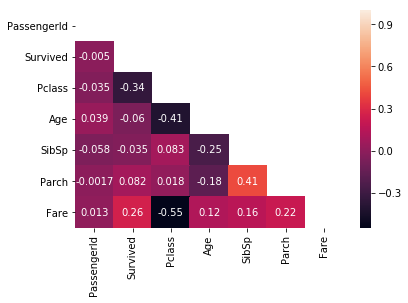

In [20]:
#Lets check the correlation between numerical values.
corrs = raw.corr()
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask, annot=True)
plt.show()
#There doesn't seem to be any strong correlation between survival rate and other factors.

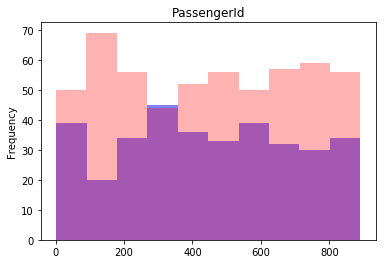

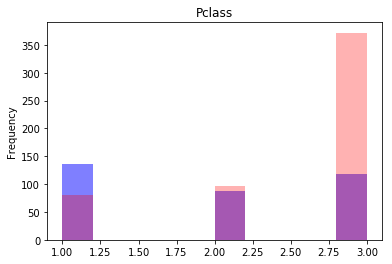

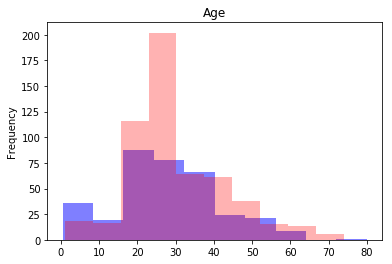

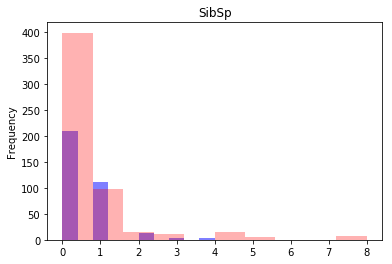

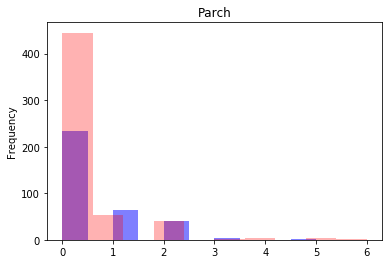

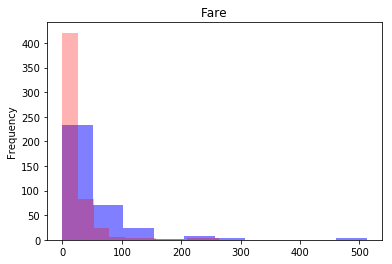

In [21]:
numerical = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']
for cat in numerical:
    raw.loc[raw['Survived']==1,cat].plot.hist(color='blue', alpha = 0.5)
    raw.loc[raw['Survived']==0,cat].plot.hist(color='red', alpha = 0.3)
    plt.title(cat)
    plt.show()

PassengerId histogram isn't expected to show us anything since it's unique for each passenger. However, we can see that the red plot almost covers the entire blue plot. If anything, this shows us the death rate. In general, more people died rather than survived.  
Pclass plot tells us more first class passengers survived than died, compared to 2nd class, which is almost 50% survival rate. 3rd class has the highest casualty rate.  
Most people who died are between 20-30 age group. However, given that most people who survived are also within the same age group, this could be a simple matter of demographics of the passengers. Instead of absolute numbers, we look at the comparisons between death and survival numbers. We can see that the survived outnumber the dead in only a few age groups: 0-10 in particular, followed by 30-40 and 50-55, by a small margin. This shows that young children have a better survival rate.  
For both SibSp and Parch plots, the same pattern is observed: For those with SibSp or Parch of between 0-1, the death rate is a lot higher than survival rate. For the other numbers, the death rate and survival rate is more or less equal. Seems like passengers are more likely to survive if their parents/spouses were around to help them out, although the rate doesn't get better than around 50%.  
And finally, people who paid the least fares are more likely to die in the accident than the people who paid more. This is consistent with the observation for the Pclass plot.  
  
##### *Note* Cabin and Ticket are not used in this analysis as both contain unique values for each passenger just like PassengerId and are not likely to provide any insights. They will also be dropped for prediction purposes later.

In [22]:
#Setting PassengerId as index so that we keep that info without using it for the models later.
raw.set_index('PassengerId', inplace=True)
test_raw.set_index('PassengerId', inplace=True)

In [23]:
#Dropping Name, Cabin and Ticket
clean = raw.drop(['Name','Cabin','Ticket'], axis = 1)
hold = test_raw.drop(['Name','Cabin','Ticket'], axis = 1)

In [24]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [25]:
hold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [26]:
#One remaining null value for Fare in hold dataset. Will fill it using the same logic as Age.
#Note, training set median value used, since test set is 'unseen'.
fare_med = clean['Fare'].median()
hold['Fare'].fillna(fare_med, inplace=True)

'clean' and 'hold' will be the final form of the dataset at this stage. Pre-processing of data / feature engineering will take place under new variable names.

### 4. Data pre-processing / Feature Engineering

In [27]:
#getting dummies
def dummy_set(df, feat_list):
    dummy = pd.get_dummies(df[feat_list], drop_first=True)
    df = df.drop(feat_list, axis=1)
    final = pd.concat((df,dummy), axis=1)
    
    return final

In [28]:
df = dummy_set(clean, ['Sex','Embarked'])
holddf = dummy_set(hold, ['Sex','Embarked'])

In [29]:
#More feature engineering: Age should be categorical instead of continuous. Use Age bands.
def age_band(df,cut_points,label_names):
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    df = df.drop('Age', axis=1)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

In [30]:
df = age_band(df,cut_points,label_names)
holddf = age_band(holddf, cut_points, label_names)

In [31]:
#Converting Pclass to string so that get_dummies can recognise it as categorical
df['Pclass']=df['Pclass'].astype(str)
holddf['Pclass']=holddf['Pclass'].astype(str)

In [32]:
df = dummy_set(df, ['Age_categories','Pclass'])
holddf = dummy_set(holddf, ['Age_categories','Pclass'])

In [33]:
#Insert any additional feature engineering here

Performing test-train split on the dataset df

In [120]:
#Splitting into X and y arrays
X_all = df.drop('Survived', axis=1)
y_all = df['Survived']

In [121]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=28)#, stratify = y_all)

### 5. Training Models

From https://www.kaggleusercontent.com/kf/4690031/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..b8i2DzjKpipLvq4TMyrFGg.tEBYlSJRIkVxql4YA81vCLz7V_scn8ogG4yq6SK_9nr22OQVhJ-54iLpc63HsSFys9weQUOLhzjnnicmt5Pu3OOeQnSjriu5CpKk79uuKwmeAmCp5BNPkzyoM84Zg2U9R_CI-Zc2bsokjRYk2LhxZrhoEtKS0cbTVnRM1gezbWY.r3bWaTy1-qp3g2ZK530-jg/__results__.html#summary-table-given-strategies-and-public-scores    
Accuracy score to beat:  
1. Guessing every passenger died: 0.62679  
2. Guessing every female survived: 0.76555

In [37]:
#Defining function for evaluating models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print("Cross-validated scores for train set:", scores)
    print("Mean cross-validated score:", scores.mean())
    
    #Fitting the model
    model = model.fit(X_train, y_train)
    
    #Predictions/probabilities on the test dataset
    y_pred = pd.DataFrame(model.predict(X_test))  
    y_prob = pd.DataFrame(model.predict_proba(X_test))

    acc = accuracy_score(y_test, y_pred)  
    roc_auc = roc_auc_score(y_test, y_prob[1])
    print("Accuracy for test set:",acc)
    print("ROC AUC Score for test set:",roc_auc)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    return model

In [38]:
#Defining function for getting important features
def impt_feat(coef, X_test):
    return pd.Series(coef, index=X_test.columns).sort_values(ascending=False)

In [39]:
#Standardising all the X variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
Xs_all = ss.fit_transform(X_all)

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: Data

#### a. Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
#'Blank' Logistic Regression without any parameters
lr = LogisticRegression()
lrmodel = evaluate_model(lr, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.76223776 0.81118881 0.86713287 0.81690141 0.81560284]
Mean cross-validated score: 0.8146127371779155
Accuracy for test set: 0.8156424581005587
ROC AUC Score for test set: 0.8627717391304348
[[99 16]
 [17 47]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       115
           1       0.75      0.73      0.74        64

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [42]:
#What if I use grid search to tune the parameters?
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,grid,cv=5)

In [43]:
lr_cv.fit(X_train,y_train)
lr_cv.best_params_

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

{'C': 1.0, 'penalty': 'l1'}

In [44]:
lr2 = lr_cv.best_estimator_ 

lrmodel2 = evaluate_model(lr2, X_train, y_train, X_test, y_test)
#Slightly better performance than 'blank' log reg at 0.5% improvement in accuracy

Cross-validated scores for train set: [0.76223776 0.81818182 0.86713287 0.81690141 0.82269504]
Mean cross-validated score: 0.8174297782928288
Accuracy for test set: 0.8156424581005587
ROC AUC Score for test set: 0.8658967391304349
[[99 16]
 [17 47]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       115
           1       0.75      0.73      0.74        64

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [45]:
#Lets predict the hold set!
lrmodel2 = lr2.fit(X_all, y_all)
y_pred = lrmodel2.predict(holddf)

C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
#writing to csv for submission
sub1 = pd.DataFrame({'PassengerId':holddf.index,'Survived':y_pred})

In [47]:
#sub1.to_csv('./data/lrcv_pred.csv', index=False)

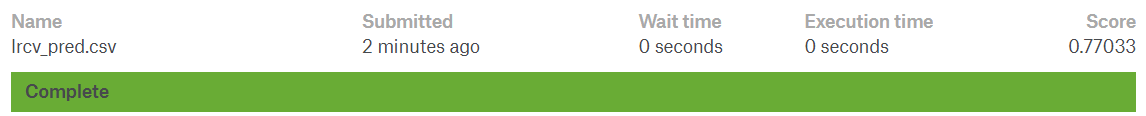

In [48]:
from IPython.display import Image
Image('./data/lrcv_pred.png')
#Best score is 0.77033

In [49]:
#Best coefficients are:
impt_feat(lrmodel2.coef_[0],X_test)

Age_categories_Infant         2.466758
Age_categories_Child          0.621615
Age_categories_Young Adult    0.110370
Fare                          0.004345
Age_categories_Teenager       0.000000
Embarked_Q                    0.000000
Parch                        -0.169318
Embarked_S                   -0.320808
SibSp                        -0.409038
Age_categories_Adult         -0.440561
Age_categories_Senior        -0.732546
Pclass_2                     -0.773208
Pclass_3                     -1.877033
Sex_male                     -2.711141
dtype: float64

#### b. XGBoost  
Let's break out the big guns.

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [112]:
#'Blank' XGBoost Classifier, default parameters
xgb = XGBClassifier(random_state=28)  

xgbmodel = evaluate_model(xgb, X_train, y_train, X_test, y_test)
#Worse than log reg? Better ROC AUC Score??

Cross-validated scores for train set: [0.79020979 0.77622378 0.85314685 0.83098592 0.83687943]
Mean cross-validated score: 0.817489153539498
Accuracy for test set: 0.7988826815642458
ROC AUC Score for test set: 0.8730298913043479
[[100  15]
 [ 21  43]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       115
           1       0.74      0.67      0.70        64

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



In [52]:
# Setting parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 28)

xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=28)

In [53]:
#Finding best parameters from randomized search CV.
xgb_random.fit(X_train, y_train)
xgb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   39.3s finished


{'subsample': 0.8,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [54]:
xgb2 = xgb_random.best_estimator_

xgbmodel2 = evaluate_model(xgb2, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.76923077 0.78321678 0.86713287 0.83098592 0.79432624]
Mean cross-validated score: 0.8089785152416258
Accuracy for test set: 0.8268156424581006
ROC AUC Score for test set: 0.8838994565217392
[[103  12]
 [ 19  45]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       115
           1       0.79      0.70      0.74        64

   micro avg       0.83      0.83      0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.83      0.82       179



In [55]:
#Lets predict the hold set!
xgbmodel2 = xgb2.fit(X_all, y_all)
y_pred = xgbmodel2.predict(holddf)

In [56]:
#writing to csv for submission
sub2 = pd.DataFrame({'PassengerId':holddf.index,'Survived':y_pred})

In [66]:
#sub2.to_csv('./data/xgb_pred.csv', index=False)

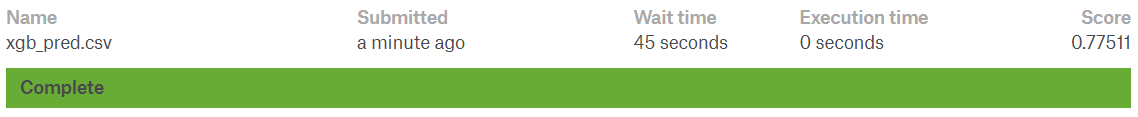

In [58]:
Image('./data/xgb_pred.png')
#Best score is 0.77511. Better, but not good enough. Need bigger guns.

In [59]:
impt_feat(xgbmodel2.feature_importances_, X_test)
#Really? Fare ranks at the top? I suppose it has collinearity with the Pclass information...

Fare                          0.321782
Sex_male                      0.172030
Pclass_3                      0.126238
Age_categories_Infant         0.111386
SibSp                         0.111386
Embarked_S                    0.047030
Parch                         0.034653
Age_categories_Child          0.025990
Age_categories_Adult          0.023515
Pclass_2                      0.018564
Age_categories_Senior         0.002475
Age_categories_Young Adult    0.002475
Embarked_Q                    0.002475
Age_categories_Teenager       0.000000
dtype: float32

#### c. XGBoost with PCA  
Also known as the 'Everything but the kitchen sink' plan

In [60]:
from sklearn.decomposition import PCA

In [133]:
#Transform X_train!!
pca = PCA() 
X_train_pca = pca.fit_transform(X_train)
#Applying the same transform to X_test.
X_test_pca = pca.transform(X_test)

In [135]:
#just for fun
X_train_pca = pd.DataFrame(data = X_train_pca, index=X_train.index, columns=range(14))
X_train_pca.corr().apply(lambda x: np.round(x,4))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
1,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
2,-0.0,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
3,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
4,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
5,-0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
7,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
8,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0
9,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0


In [136]:
X_test_pca = pd.DataFrame(data = X_test_pca, index=X_test.index, columns=range(14))
X_test_pca.corr().apply(lambda x: np.round(x,4))
#PCA removes collinearity based on the training set but does not necessarily do the same for the test set. 
#I cannot refit the PCA to the test set as it defeats the purpose of test set being unseen data.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0000,-0.1880,-0.0134,0.1075,-0.0071,0.0173,0.0887,0.0642,0.1088,0.0083,0.0657,0.0019,-0.1019,-0.0256
1,-0.1880,1.0000,0.0069,0.0176,-0.0024,-0.1502,0.0103,0.0911,-0.0130,0.1317,0.0586,-0.2145,0.0014,-0.1273
2,-0.0134,0.0069,1.0000,-0.0229,-0.0926,0.0037,-0.0489,0.0903,-0.0630,0.1179,-0.0143,-0.1660,-0.1160,-0.6075
3,0.1075,0.0176,-0.0229,1.0000,-0.0090,0.0737,-0.0734,0.0188,-0.0421,-0.0660,0.1840,0.1223,0.0782,0.0614
4,-0.0071,-0.0024,-0.0926,-0.0090,1.0000,-0.0615,0.1044,0.0587,0.0398,0.0636,0.0087,-0.0053,0.0373,0.5790
5,0.0173,-0.1502,0.0037,0.0737,-0.0615,1.0000,0.1088,0.0573,0.1974,-0.0605,-0.0938,-0.0861,-0.0577,0.2998
6,0.0887,0.0103,-0.0489,-0.0734,0.1044,0.1088,1.0000,-0.0169,-0.0458,-0.0342,0.1765,-0.0263,-0.0224,0.2290
7,0.0642,0.0911,0.0903,0.0188,0.0587,0.0573,-0.0169,1.0000,0.1231,0.0884,0.0584,-0.1649,-0.0513,0.1483
8,0.1088,-0.0130,-0.0630,-0.0421,0.0398,0.1974,-0.0458,0.1231,1.0000,0.0393,0.1395,0.0060,0.1208,0.0425
9,0.0083,0.1317,0.1179,-0.0660,0.0636,-0.0605,-0.0342,0.0884,0.0393,1.0000,0.2469,-0.2315,-0.1116,-0.0792


In [89]:
# Setting parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 28)

xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, n_jobs=-1, cv=skf.split(X_train_pca,y_train), verbose=3, random_state=28)

In [90]:
#Finding best parameters from randomized search CV.
xgb_random.fit(X_train_pca, y_train)
xgb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.7s finished


{'subsample': 0.6,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

In [91]:
xgb3 = xgb_random.best_estimator_
xgbmodel3 = evaluate_model(xgb3, X_train_pca, y_train, X_test_pca, y_test)
#Not better at all!! 

Cross-validated scores for train set: [0.76223776 0.78321678 0.85314685 0.80985915 0.78723404]
Mean cross-validated score: 0.7991389192168334
Accuracy for test set: 0.7988826815642458
ROC AUC Score for test set: 0.8500679347826088
[[97 18]
 [18 46]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.72      0.72      0.72        64

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [92]:
#Lets predict holddf!!!
X_all_pca = pca.fit_transform(X_all)

In [97]:
X_all_pca = pd.DataFrame(data = X_all_pca, index=X_all.index, columns=range(7))
X_all_pca.corr()

,0,1,2,3,4,5,6
0,1.000000e+00,-7.908456e-17,4.952187e-17,-3.533193e-18,7.743740e-18,-3.519240e-17,-2.365149e-17
1,-7.908456e-17,1.000000e+00,1.930381e-16,5.368323e-17,7.245318e-18,7.156190e-17,-5.747437e-18
2,4.952187e-17,1.930381e-16,1.000000e+00,-3.101494e-16,4.738203e-17,1.765961e-16,3.026946e-17
3,-3.533193e-18,5.368323e-17,-3.101494e-16,1.000000e+00,-1.532701e-16,2.178698e-17,-1.126911e-16
4,7.743740e-18,7.245318e-18,4.738203e-17,-1.532701e-16,1.000000e+00,-3.051810e-16,-1.099288e-16
5,-3.519240e-17,7.156190e-17,1.765961e-16,2.178698e-17,-3.051810e-16,1.000000e+00,-3.417164e-16
6,-2.365149e-17,-5.747437e-18,3.026946e-17,-1.126911e-16,-1.099288e-16,-3.417164e-16,1.000000e+00


In [98]:
holddf_pca = pca.transform(holddf)

In [99]:
holddf_pca = pd.DataFrame(data = holddf_pca, index=holddf.index, columns=range(7))
holddf_pca.corr()

,0,1,2,3,4,5,6
0,1.000000,-0.024274,0.080516,-0.018598,-0.084591,0.000879,-0.000885
1,-0.024274,1.000000,0.234973,0.101855,0.006187,0.105562,0.008180
2,0.080516,0.234973,1.000000,0.206290,0.023334,0.172451,0.106760
3,-0.018598,0.101855,0.206290,1.000000,0.002934,0.065467,0.039167
4,-0.084591,0.006187,0.023334,0.002934,1.000000,0.091395,0.018762
5,0.000879,0.105562,0.172451,0.065467,0.091395,1.000000,0.020015
6,-0.000885,0.008180,0.106760,0.039167,0.018762,0.020015,1.000000


In [100]:
xgbmodel3 = xgb3.fit(X_all_pca, y_all)
y_pred = xgbmodel3.predict(holddf_pca)

In [101]:
#writing to csv for submission
sub3 = pd.DataFrame({'PassengerId':holddf.index,'Survived':y_pred})

In [102]:
#sub3.to_csv('./data/xgb_pca_pred.csv', index=False)

#### d. Random Forest Classifier  
Because the kitchen sink didn't work

In [117]:
from sklearn.ensemble import RandomForestClassifier 

In [127]:
#'Blank' default hyperparameters for random forest
rfc = RandomForestClassifier()
rfcmodel = evaluate_model(rfc, X_train, y_train, X_test, y_test)

Cross-validated scores for train set: [0.79020979 0.75524476 0.78321678 0.8028169  0.80141844]
Mean cross-validated score: 0.7865813339592183
Accuracy for test set: 0.7821229050279329
ROC AUC Score for test set: 0.8255434782608695
[[96 19]
 [20 44]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       115
           1       0.70      0.69      0.69        64

   micro avg       0.78      0.78      0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest

In [129]:
#Setting parameter grid for random forest classifier
rfc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=28, n_jobs = -1)

In [130]:
#Finding best parameters from randomized search CV.
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.4min finished


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [132]:
rfc2 = rf_random.best_estimator_

rfcmodel2 = evaluate_model(rfc, X_train, y_train, X_test, y_test)
#Not much better accuracy, but much better ROC AUC Score

Cross-validated scores for train set: [0.76923077 0.7972028  0.7972028  0.78169014 0.78723404]
Mean cross-validated score: 0.7865121094069252
Accuracy for test set: 0.7988826815642458
ROC AUC Score for test set: 0.8595788043478261
[[100  15]
 [ 21  43]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       115
           1       0.74      0.67      0.70        64

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\yitaris\Anaconda3\lib\site-packages\sklearn\ensemble\forest

In [137]:
#How about PCA?
#Finding best parameters from randomized search CV.
rf_random.fit(X_train_pca, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [139]:
rfc3 = rf_random.best_estimator_

rfcmodel3 = evaluate_model(rfc3, X_train_pca, y_train, X_test_pca, y_test)

Cross-validated scores for train set: [0.75524476 0.7972028  0.85314685 0.85915493 0.80851064]
Mean cross-validated score: 0.8146519946939487
Accuracy for test set: 0.8156424581005587
ROC AUC Score for test set: 0.8570652173913045
[[98 17]
 [16 48]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.74      0.75      0.74        64

   micro avg       0.82      0.82      0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



In [140]:
#Predicting for holddf
rfcmodel3 = rfc3.fit(X_all_pca, y_all)
y_pred = rfcmodel3.predict(holddf_pca)

In [141]:
#writing to csv for submission
sub4 = pd.DataFrame({'PassengerId':holddf.index,'Survived':y_pred})

In [142]:
#sub4.to_csv('./data/rfc_pca_pred.csv',index=False)